# MNIST MULTI-LAYER PERCEPTRON

In [1]:
import tensorflow as tf 

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("tmp/data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Extracting tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
 type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images.shape
'''
 there is 55000 images and each image is from 784 pixels
'''

'\n there is 55000 images and each image is from 784 pixels\n'

In [6]:
#mnist.train.images[2].reshape(28,28)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

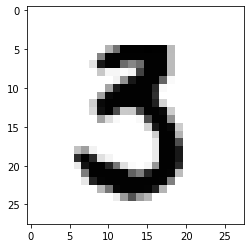

In [8]:
# imshow allow us to show image from matrix column 
plt.imshow(mnist.train.images[80].reshape(28,28),cmap="Greys")


# we are going to try to make a deep learning or multi layer precepteress network to be able to just take in the pixel information here and correctly classify it as to whatever number it represents  and correctly classify it as to whatever number it represents 


In [9]:
# define some para
#(the tree basic parametres that we are going to use later)
    # the learning rate 
    # the number of training 
    # the patch batch size 


In [10]:
# he going to be how wuickly we adjust our cost function 
learning_rate = 0.001
#how many training we going through 
training_epochs = 15
# the size of the batches of training data 
batch_size =   100

In [17]:
# now we have some network parameters that directly define 
# what our neural network will look like 
n_classes = 10 #(the number of output we must have 1,2,3...10)
n_sample = mnist.train.num_examples # number of observation or input 
n_sample


55000

In [19]:
n_input = 784 # the nb pixel  of obervation we want only images of 784 pix 
# cause we have 28*28

In [20]:
# how  many neurons we are goiing to use 
# we use 256 because computer store image information like this 
n_hideden_l1 = 256
n_hideden_l2 = 256

In [22]:
'''
 now we have our param next we are going to  receive our input data 
array and send it to the first hidden layer of 256 neurons  then the data beging 
having weight attached to it between the layers thats oass along  between the layers 
also we add a bais along then continue to the next hid layer 
till the end outputlayer 
once that transformed data that'e been multiplied by these waits had reashed the output layer 
we evaluate how far off  from the desires results  we are  we are goiing to use a cost or loss function
and check how many classes are correct and minimize this cost function by adjusting the 
weight values.

in our case we will use a very commun optimizer Atom optimizer 
we are going to see how quickly to apply this optimization by changing the learning rate 
that say how quickly do you want apply that optimization function
and the lower the rate the higher the accurate with lot of time 

'''

"\n now we have our param next we are going to  receive our input data \narray and send it to the first hidden layer of 256 neurons  then the data beging \nhaving weight attached to it between the layers thats oass along  between the layers \nalso we add a bais along then continue to the next hid layer \ntill the end outputlayer \nonce that transformed data that'e been multiplied by these waits had reashed the output layer \nwe evaluate how far off  from the desires results  we are  we are goiing to use a cost or loss function\nand check how many classes are correct and minimize this cost function by adjusting the \nweight values.\n\nin our case we will use a very commun optimizer Atom optimizer \nwe are going to see how quickly to apply this optimization by changing the learning rate \nthat say how quickly do you want apply that optimization function\nand the lower the rate the higher the accurate with lot of time \n\n"

# create our function 

In [34]:
# this function create a model we ll stat with two hitting layers 
# and going to use the RELU activation function which is the very simple
# rectifier function which return x or 0
# for the final output we will unse linear activation matrix multiplication 


def multiplayer_preceptron(x,weiths,baises):
    '''
     x : placeholder for data input 
     weights : dic of weights
     biases  : dic of bias values 
    '''
    
    #first Hiden Layer with RELU  ACtivation 
    # X * W + B 
    layer_1 = tf.add(tf.matmul(x,weights['h1']),baises['b1'])
    # func (x*w+b) = RELU -> f(x)= max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    #Second hidden layer 
    #first Hiden Layer with RELU  ACtivation 
    # X * W + B 
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),baises['b2'])
    # func (x*w+b) = RELU -> f(x)= max(0,x)
    layer_1 = tf.nn.relu(layer_2)
    
    #last output layer 
    out_layer = tf.matmul(layer_2,weights["out"])+ baises["out"]
    
    return out_layer


In [35]:
# the dic of weights and Bias 
# we goona introduce a new object type from tf called variable 
# and this is diferent from constant because tf has what's know as 
#graph object  that can become aware of the states of all variables 
# and variable is editable in tf 

weights = {
    # cause we want wights to be random 
    "h1":tf.Variable(tf.random_normal([n_input,n_hideden_l1])),
    "h2":tf.Variable(tf.random_normal([n_hideden_l1,n_hideden_l2])),
    "out": tf.Variable(tf.random_normal([n_hideden_l2,n_classes]))
}
weights

{'h1': <tf.Variable 'Variable_9:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_10:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_11:0' shape=(256, 10) dtype=float32_ref>}

In [36]:
biases = {
    # cause we want biases  to be random 
    # we want to be an item of a list 
    "b1":tf.Variable(tf.random_normal([n_hideden_l1])),
    "b2":tf.Variable(tf.random_normal([n_hideden_l2])),
    "out": tf.Variable(tf.random_normal([n_classes]))
}

In [52]:
# the last thing to do is set to placeholder for x and y 
x = tf.placeholder("float",[None,n_input])

In [53]:
y = tf.placeholder("float",[None,n_classes])

In [54]:
# now we construct the model 

In [55]:
pred = multiplayer_preceptron(x,weights,biases)

In [56]:
# define out cost optimization function 

In [62]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels=y))

In [63]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [64]:
# the next thing we will do is just train our model 
# and train our model for 15 epochs

# Training the model 

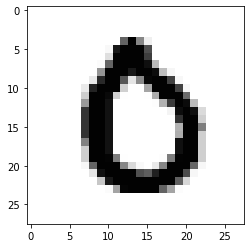

In [73]:
# there is one more convenience function to explain  that's 
# available in our mnist data object next_batch what doeas 
#you can pass in a number and will return ad tuple of batch of 10 sample 

t = mnist.train.next_batch(1)
# what means it just a 10 sample of the actual training data 
Xsamp,Ysamp = t
plt.imshow(Xsamp.reshape(28,28),cmap="Greys")

# to conclude next batch return the input and their label as here 
# as here the degit in the image and the label that correspond to it 


In [74]:
Ysamp

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

  ## RUN THE SESSION 

In [76]:
sess = tf.InteractiveSession()

In [77]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [78]:
sess.run(init)

In [82]:
# 15 loops 
for epoch in range(training_epochs):
    
    # cost 
    avg_cost = 0.0
    total_batch = int (n_sample/batch_size)
    for i in range(total_batch):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        # now we will u se the feed dictionary for the optimization
        # and loss value 
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        # the reason we put anderscore because we will never goin to use 
        # this variable so sess run return the loss value 
        avg_cost += c/total_batch
        
    print("Epoch : {} cost {:.4f}".format(epoch+1,avg_cost))
print("Model has completed {} epochs of training ".format(training_epochs))

Epoch : 1 cost 219.7692
Epoch : 2 cost 55.2873
Epoch : 3 cost 35.2287
Epoch : 4 cost 25.1905
Epoch : 5 cost 18.5790
Epoch : 6 cost 14.5779
Epoch : 7 cost 11.4998
Epoch : 8 cost 8.9865
Epoch : 9 cost 7.3399
Epoch : 10 cost 5.9399
Epoch : 11 cost 4.9876
Epoch : 12 cost 4.0577
Epoch : 13 cost 3.5024
Epoch : 14 cost 3.1145
Epoch : 15 cost 2.4469
Model has completed 15 epochs of training 


# TIME TO EVALUATE OUR MODEL 

In [96]:
#tf.equal is a way of checking how many predication are equal to the test 
correct_prod= tf.equal(tf.argmax(pred,1),tf.arg_max(y,1))

In [84]:
print(correct_prod[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [85]:
correct_prod = tf.cast(correct_prod,"float")

In [86]:
print(correct_prod[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [87]:
# reduce mean in order to grab the mean of elements across the tensor
accuracy = tf.reduce_mean(correct_prod)

In [89]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [90]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [91]:
#mnits.test.images[0]

In [94]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.9506